## Задание

  1) Скачайте материалы к занятию.
  
  2) Проанализируйте ряды и сделайте их стационарными.
  
  3) Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [1]:
!git clone https://github.com/moskow23rus/Netology_Time-series_HW-1.git

Cloning into 'Netology_Time-series_HW-1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 6.57 KiB | 1.31 MiB/s, done.


In [2]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

# 1) Скачиваем необходимые данные.

In [3]:
sales_of_company_x = pd.read_csv("Netology_Time-series_HW-1/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Netology_Time-series_HW-1/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Netology_Time-series_HW-1/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Netology_Time-series_HW-1/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Netology_Time-series_HW-1/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Netology_Time-series_HW-1/daily-total-female-births-in-cal.csv")

#2) Проведем анализ данных:
    а) monthly-sales-of-company-x-jan-6;
    б) monthly-boston-armed-robberies-j;
    в) international-airline-passengers;
    г) mean-monthly-air-temperature-deg;
    д) weekly-closings-of-the-dowjones-;
    е) daily-total-female-births-in-cal

In [4]:
#Функция подсчета стационарности
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [5]:
#Графическое отображение данных
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## а) monthly-sales-of-company-x-jan-6

In [6]:
series_1 = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


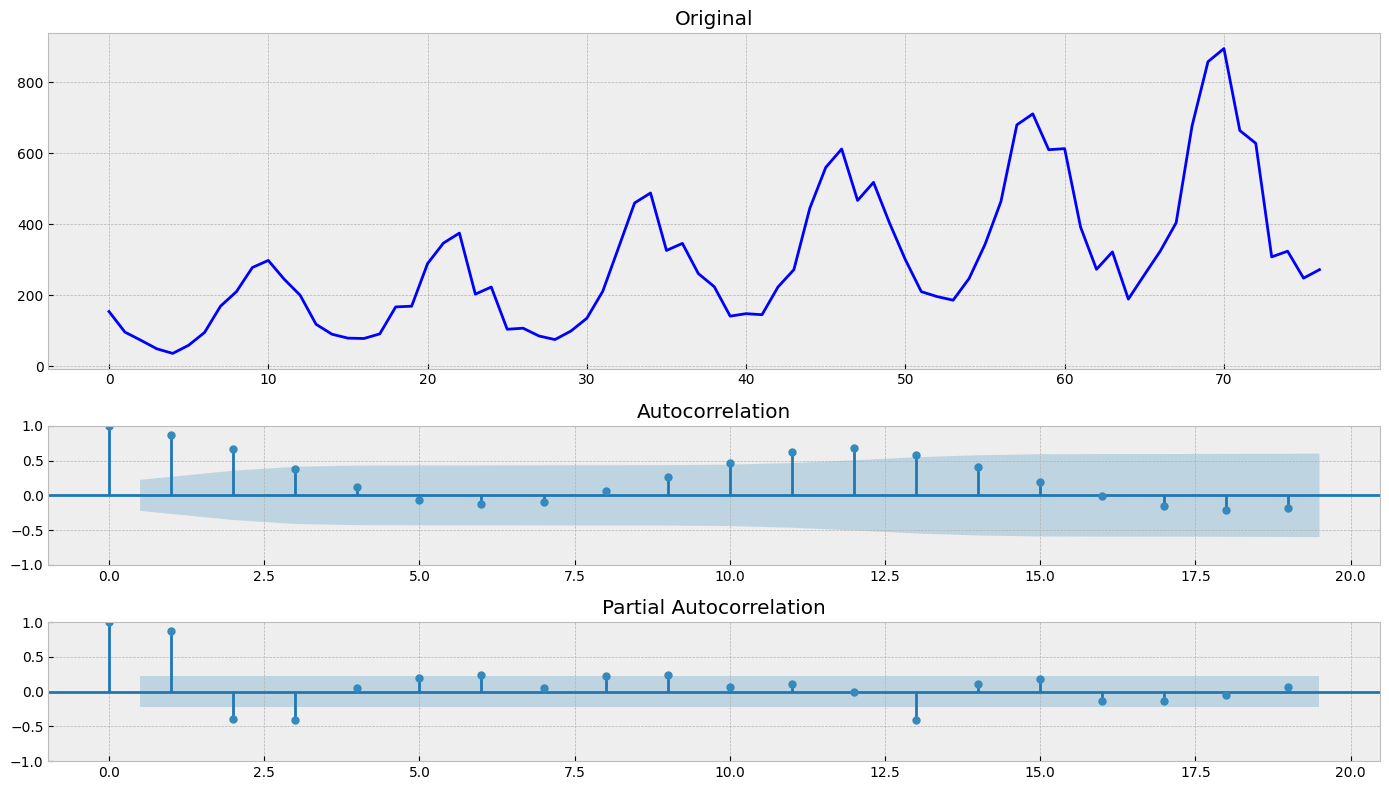

In [7]:
tsplot(series_1)

По тесту Дики-Фуллера и графикам коррелограм видно, что график нестационарный.
Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

In [8]:
series_1_bc = boxcox(series_1, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


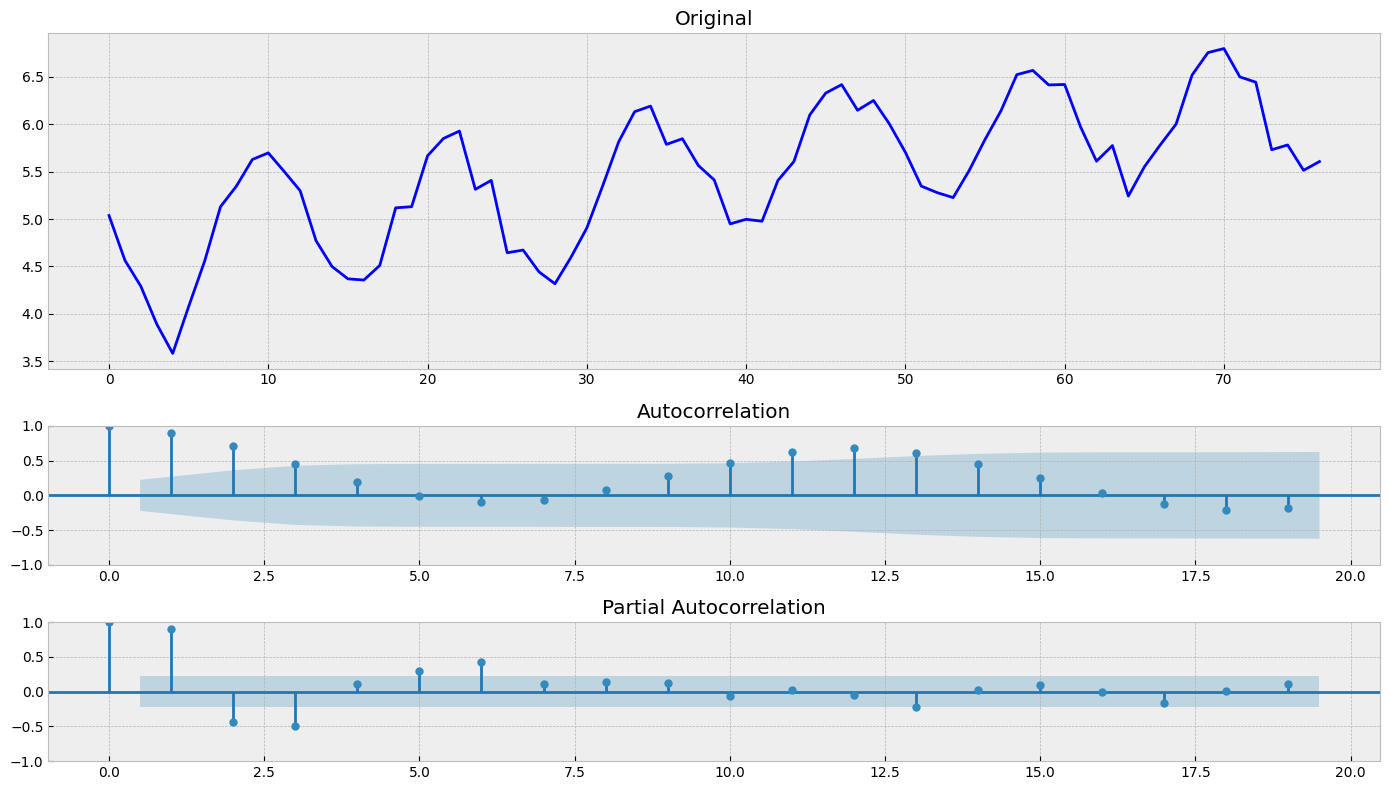

In [9]:
tsplot(series_1_bc)

После прообразований удалось убрать размах дисперсии, но по результатам теста Дики-Фуллера и анализу графиков коррелограм график продолжает оставаться нестационарным. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [10]:
series_1_dif = series_1_bc[1:] - series_1_bc[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


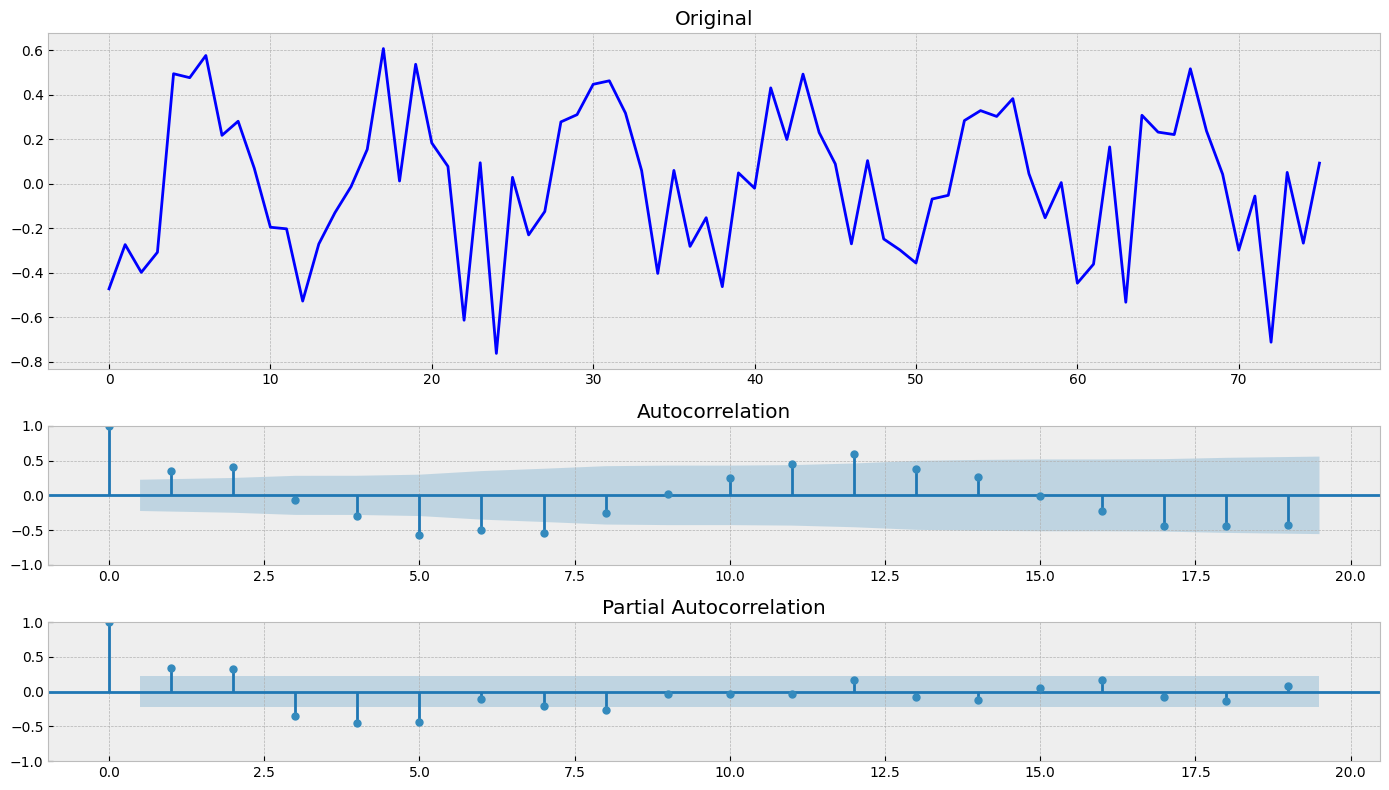

In [11]:
tsplot(series_1_dif)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее.

In [18]:
series_no_season_1 = series_1_dif[12:] - series_1_dif[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


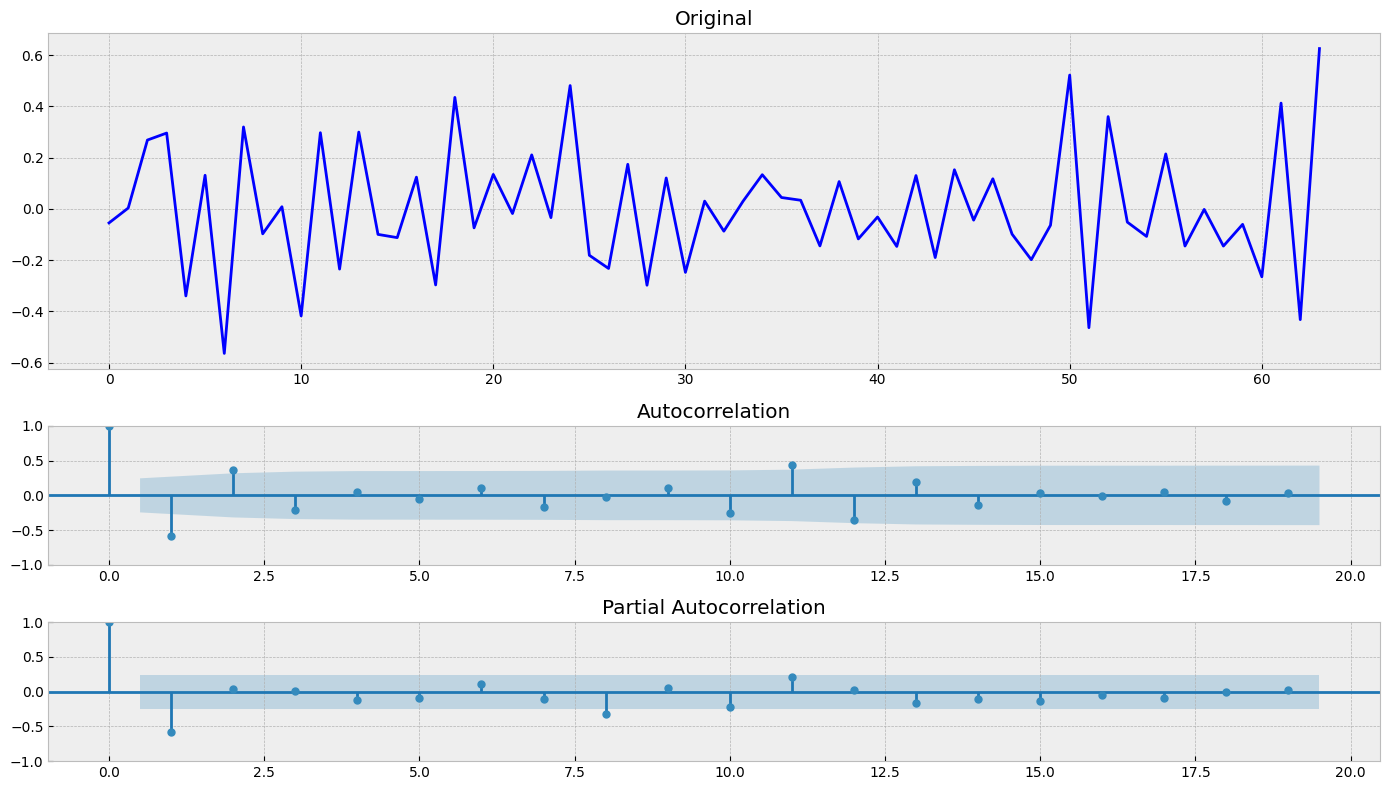

In [19]:
tsplot(series_no_season_1)

In [23]:
series_no_season_1_dif = series_no_season_1[1:] - series_no_season_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


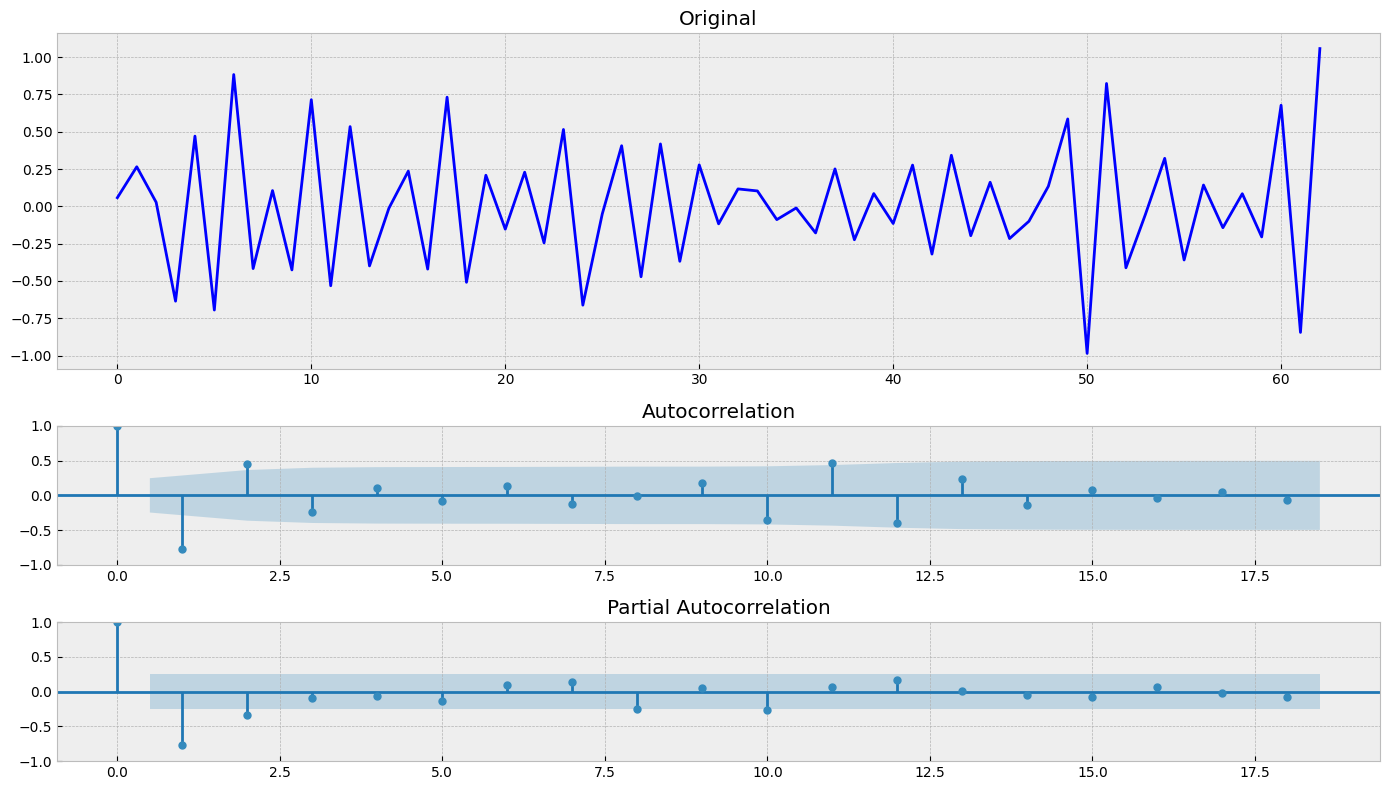

In [24]:
tsplot(series_no_season_1_dif)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## б) monthly-boston-armed-robberies-j

In [26]:
series_2 = robberies_in_boston['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


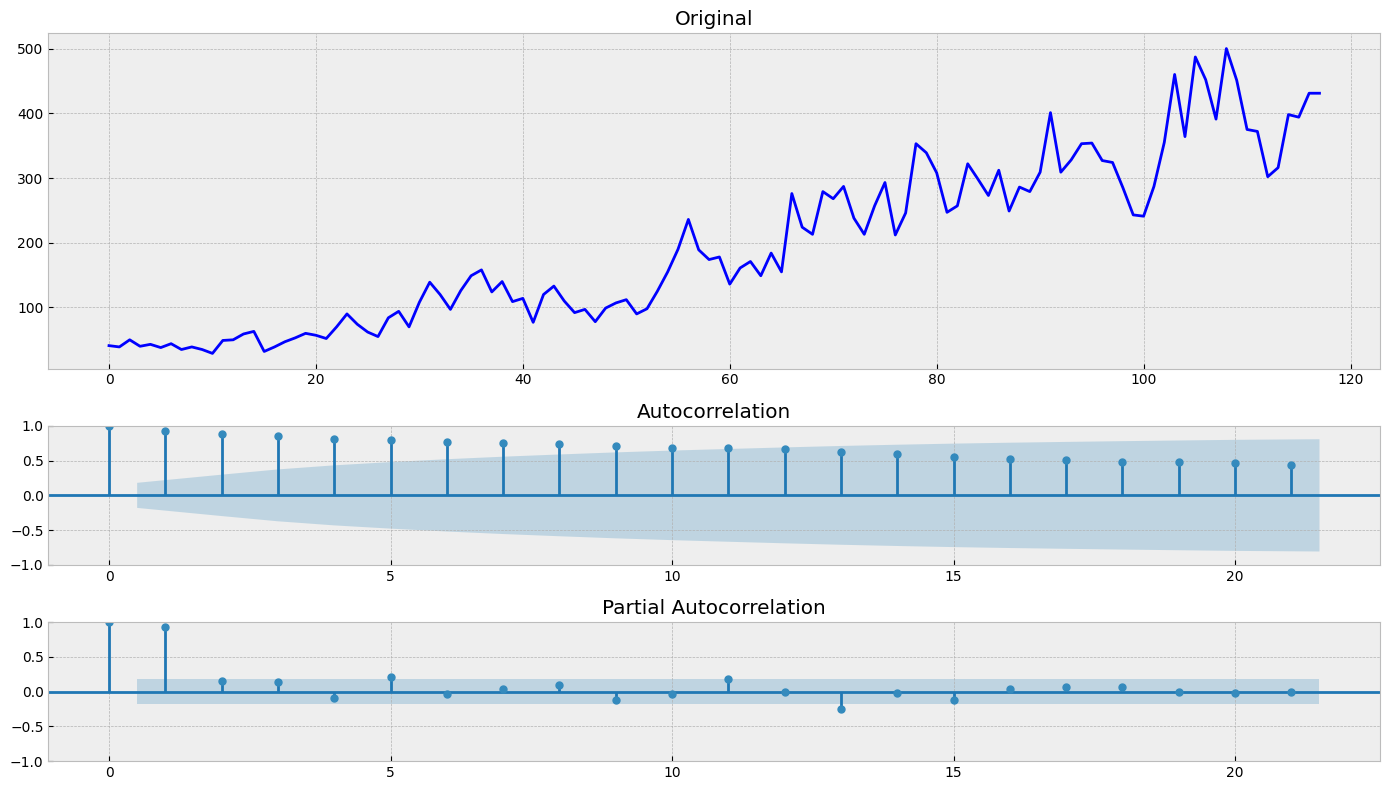

In [27]:
tsplot(series_2)

По тесту Дики-Фуллера и графикам коррелограм видно, что график нестационарный. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

In [28]:
series_2_bc = boxcox(series_2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


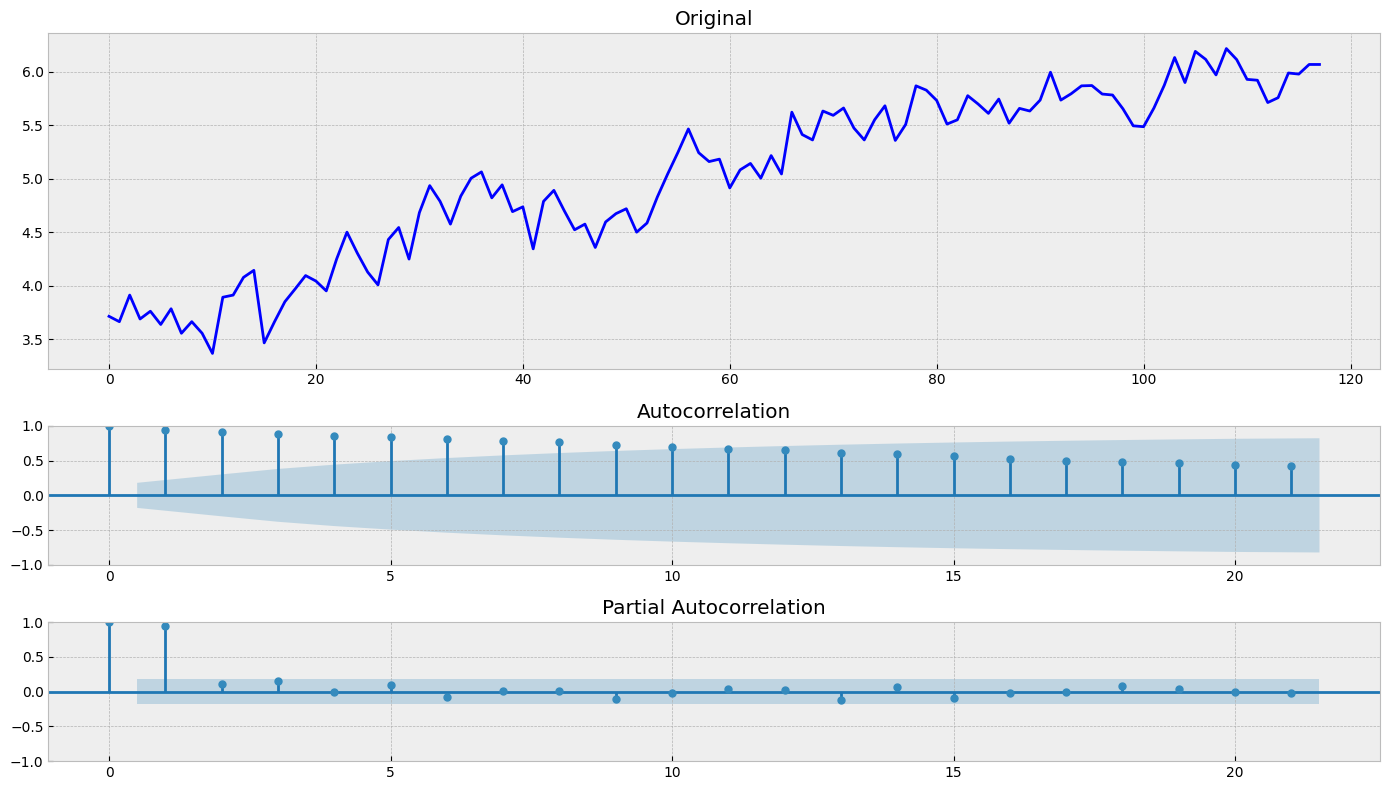

In [29]:
tsplot(series_2_bc)

После прообразований удалось убрать размах дисперсии, но по результатам теста Дики-Фуллера и анализу графиков коррелограм график продолжает оставаться нестационарным. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [30]:
series_2_dif = series_2_bc[1:] - series_2_bc[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


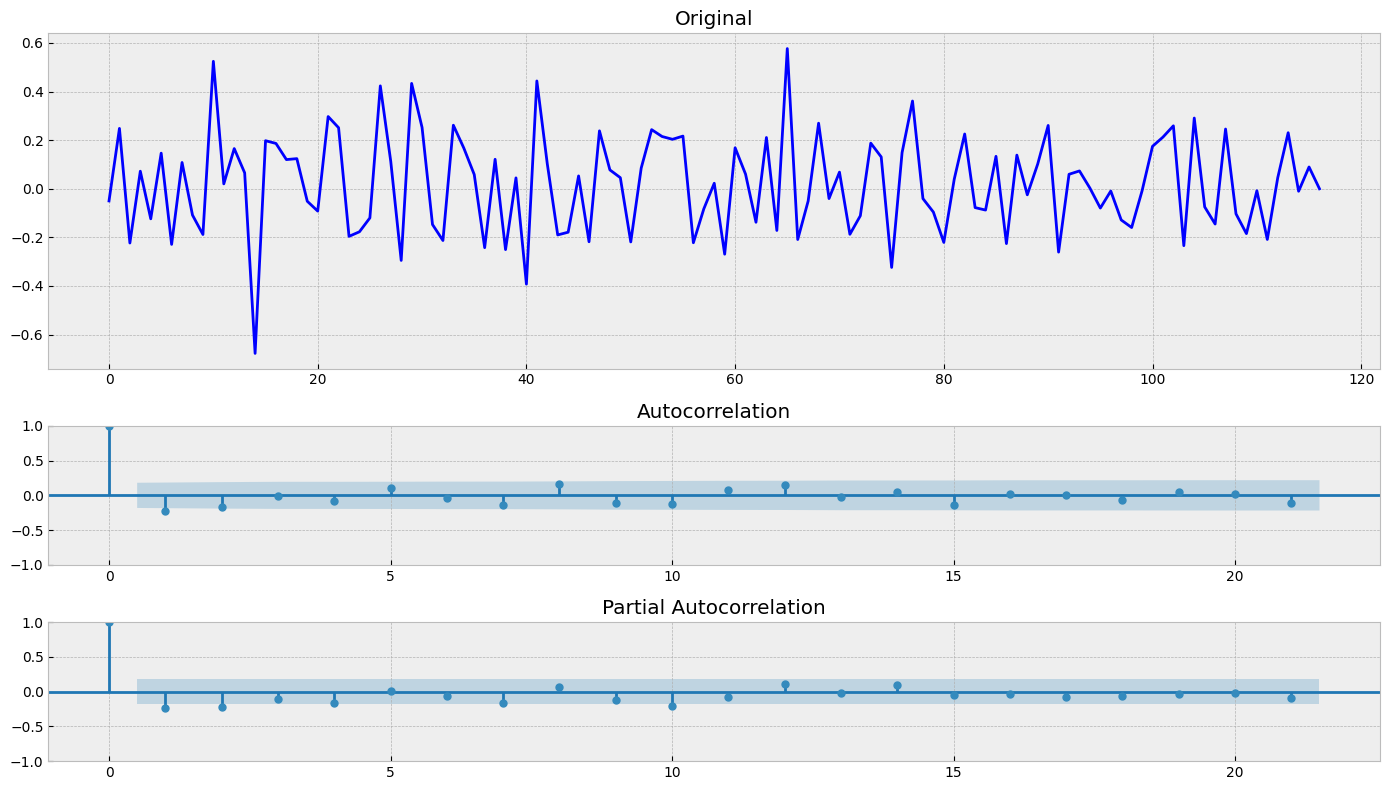

In [32]:
tsplot(series_2_dif)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее.

In [39]:
series_no_season_2 = series_2_dif[12:] - series_2_dif[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -3.938974
p-value                         0.001766
#Lags Used                     13.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


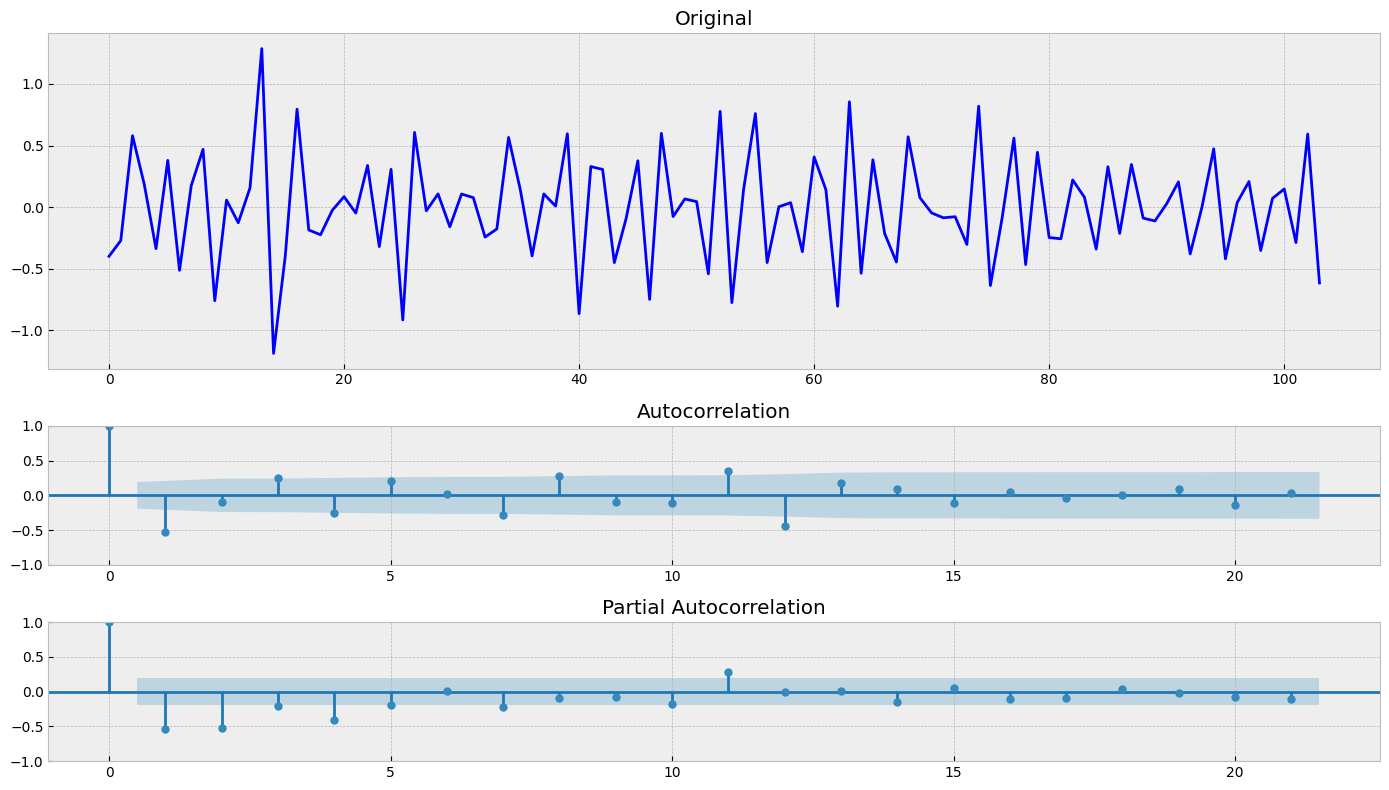

In [40]:
tsplot(series_no_season_2)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## в) international-airline-passengers.

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


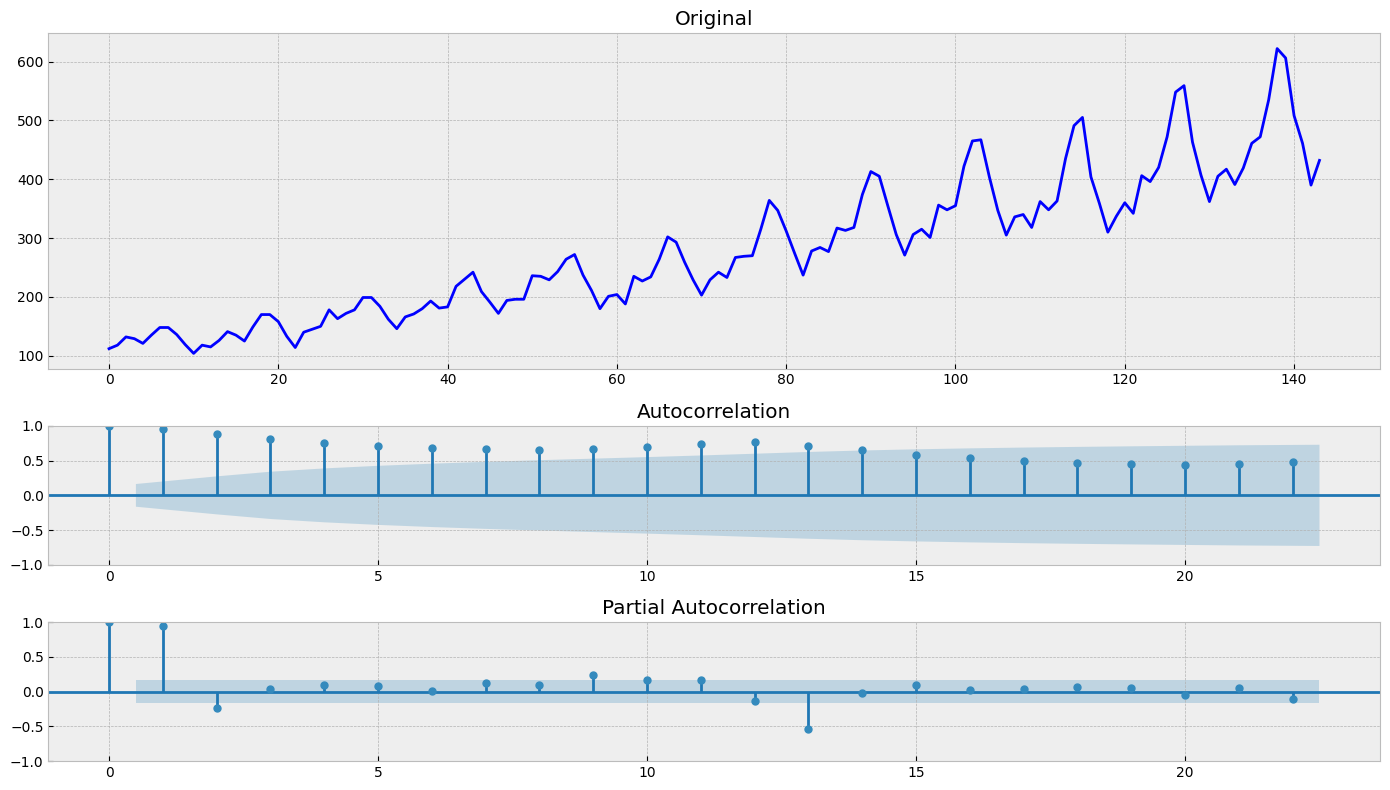

In [46]:
series_3 = airlines_passengers['Count']

tsplot(series_3)

По тесту Дики-Фуллера и графикам коррелограм видно, что график нестационарный. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


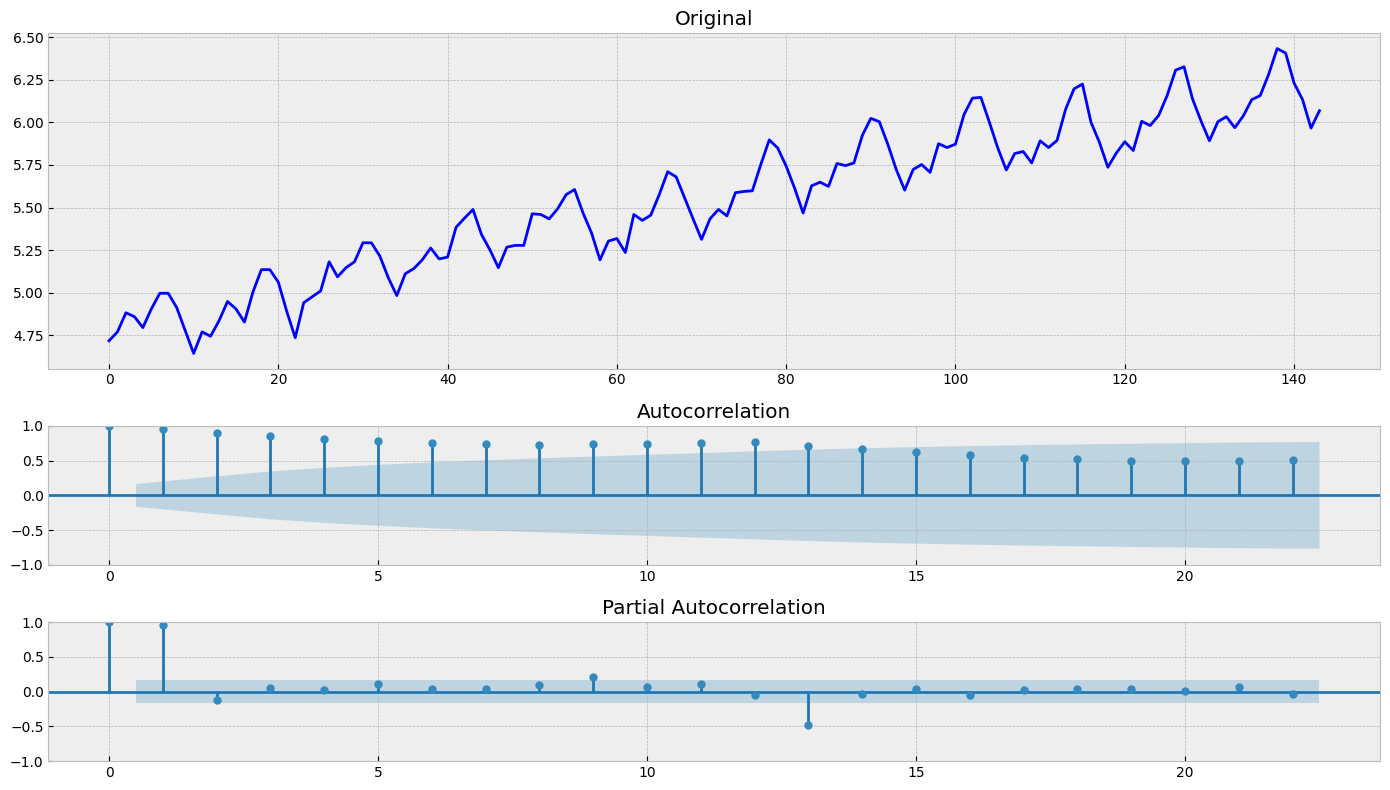

In [47]:
series_bc_3 = boxcox(series_3, 0)

tsplot(series_bc_3)

После прообразований удалось убрать размах дисперсии, но по результатам теста Дики-Фуллера и анализу графиков коррелограм график продолжает оставаться нестационарным. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


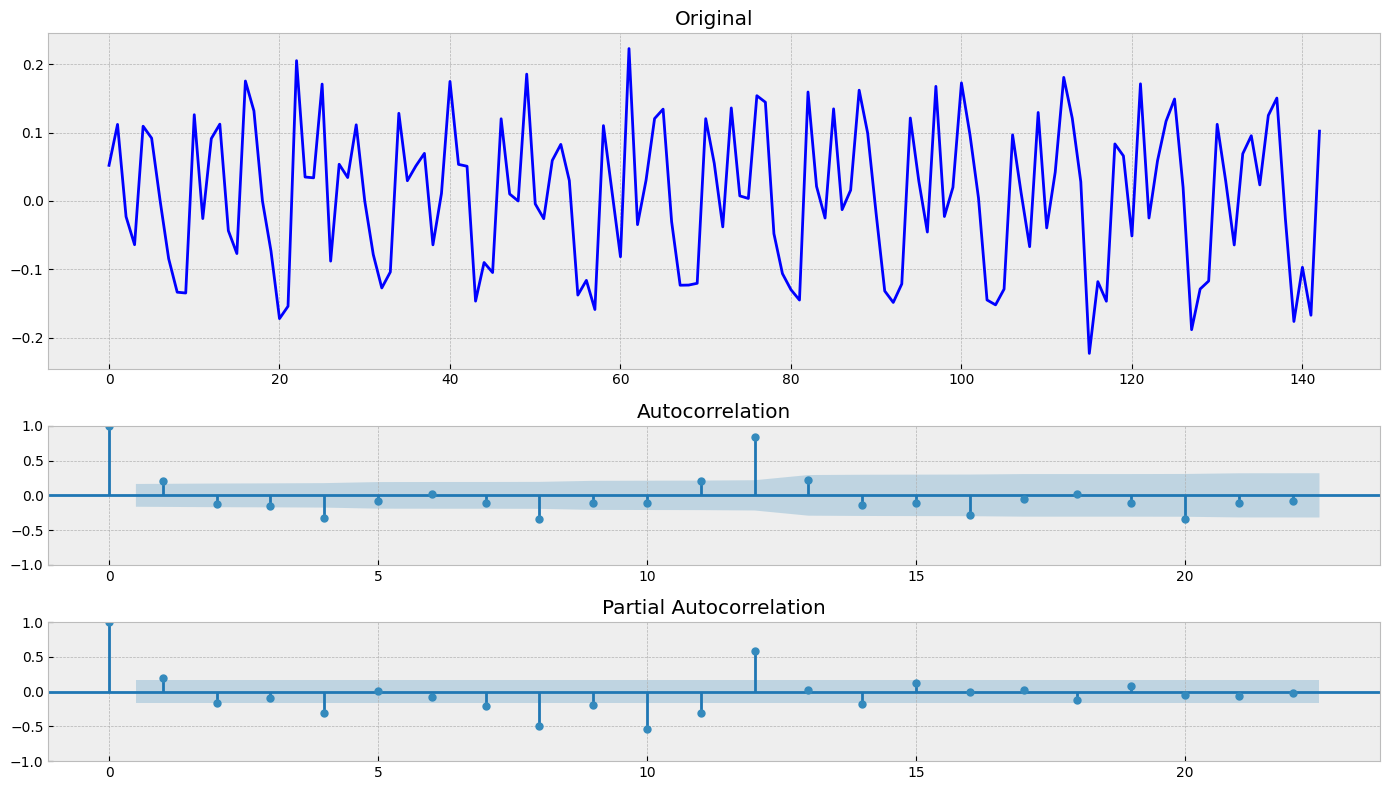

In [48]:
series_dif_3 = series_bc_3[1:] - series_bc_3[:-1]

tsplot(series_dif_3)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


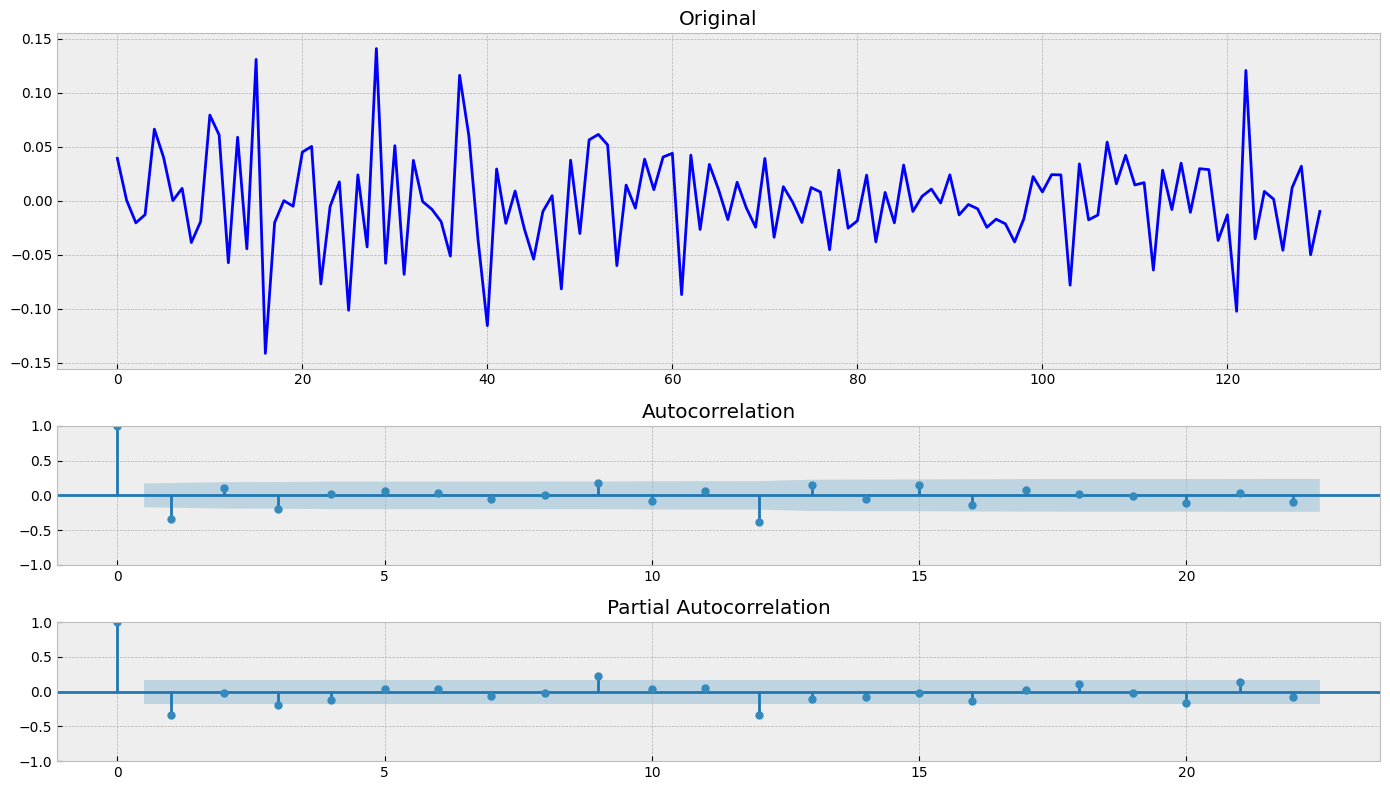

In [49]:
series_no_season_3 = series_dif_3[12:] - series_dif_3[:-12]

tsplot(series_no_season_3)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

## г) mean-monthly-air-temperature-deg.

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


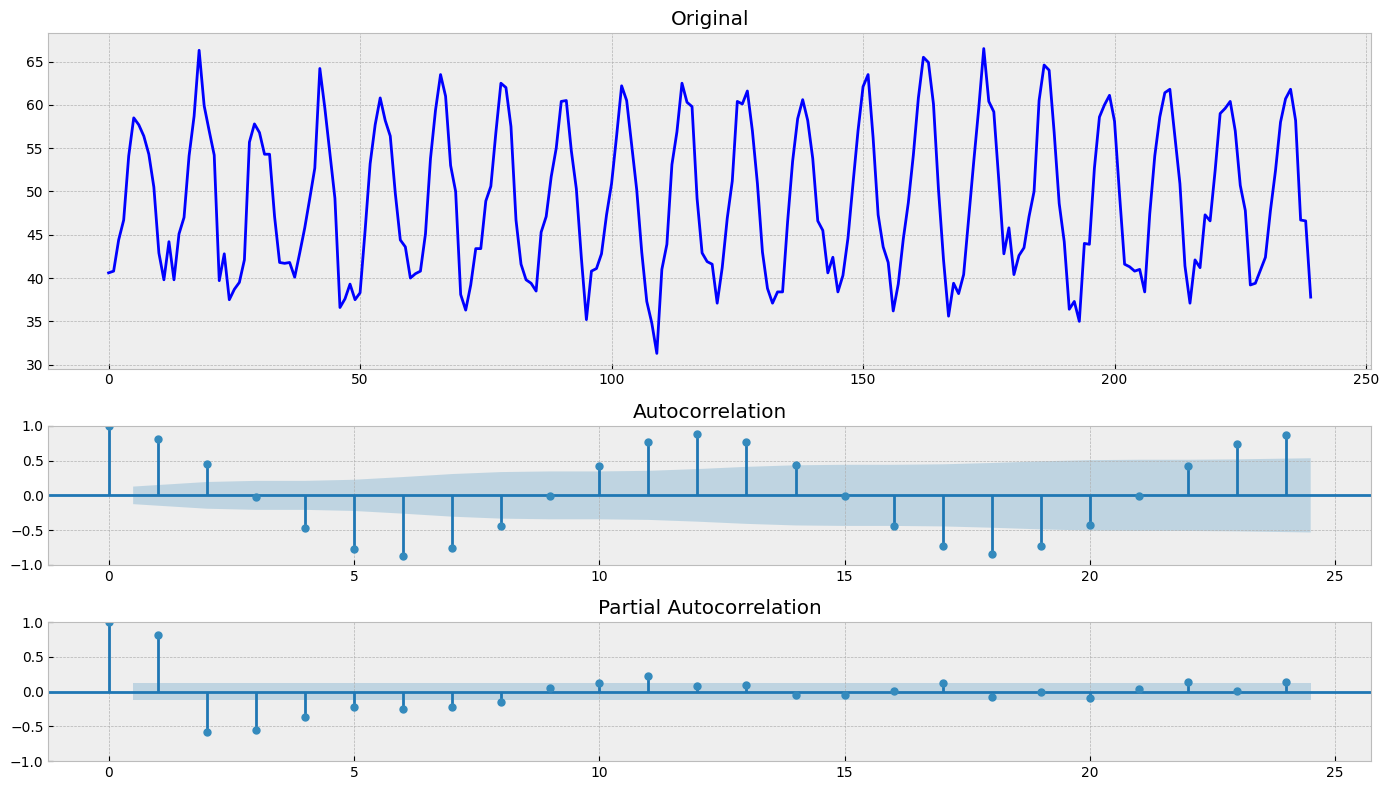

In [59]:
series_4 = mean_monthly_temp['Deg']

tsplot(series_4)

По графикам коррелограм видно, что график нестационарный. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


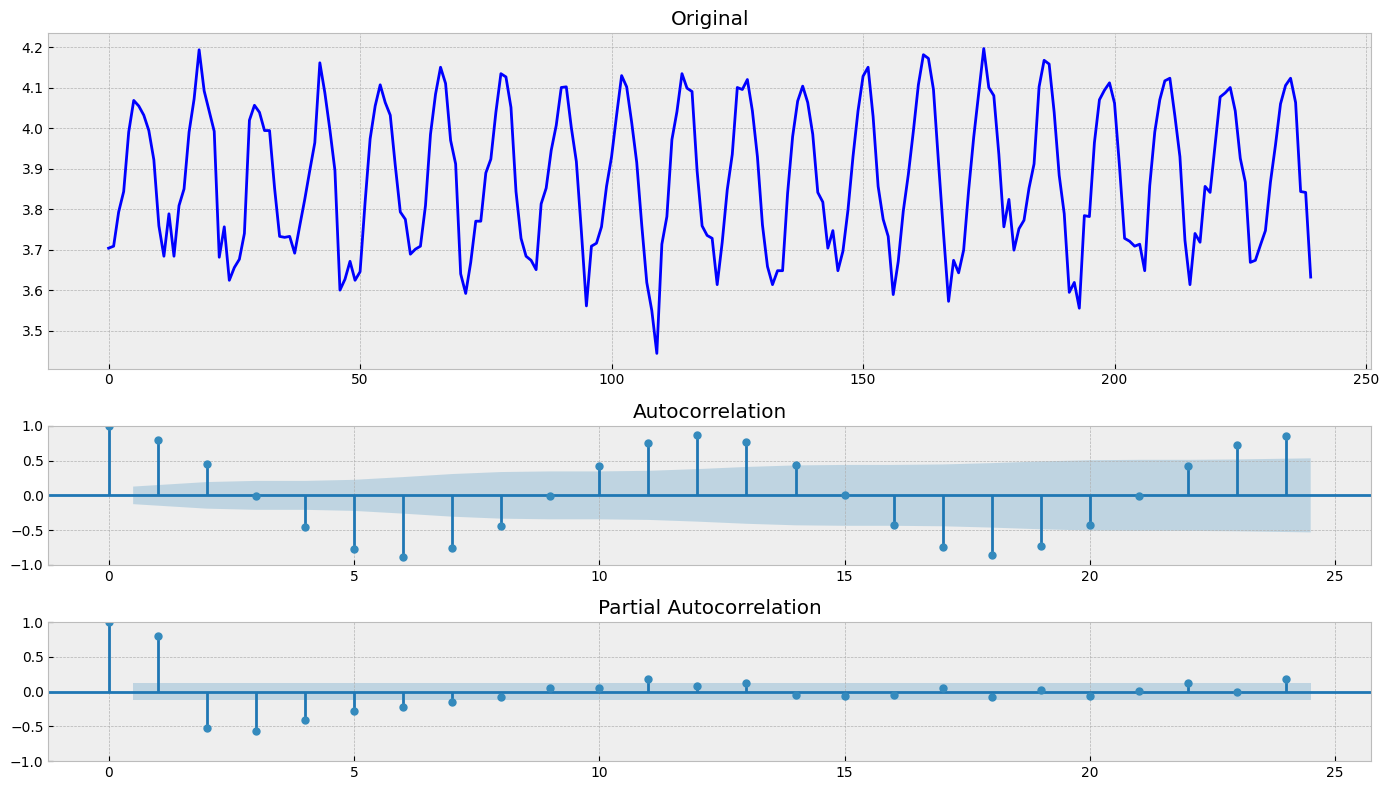

In [60]:
series_bc_4 = boxcox(series_4, 0)

tsplot(series_bc_4)

После прообразований удалось убрать размах дисперсии, но по результатам теста Дики-Фуллера и анализу графиков коррелограм график продолжает оставаться нестационарным. Применим дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -1.214226e+01
p-value                        1.640728e-22
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


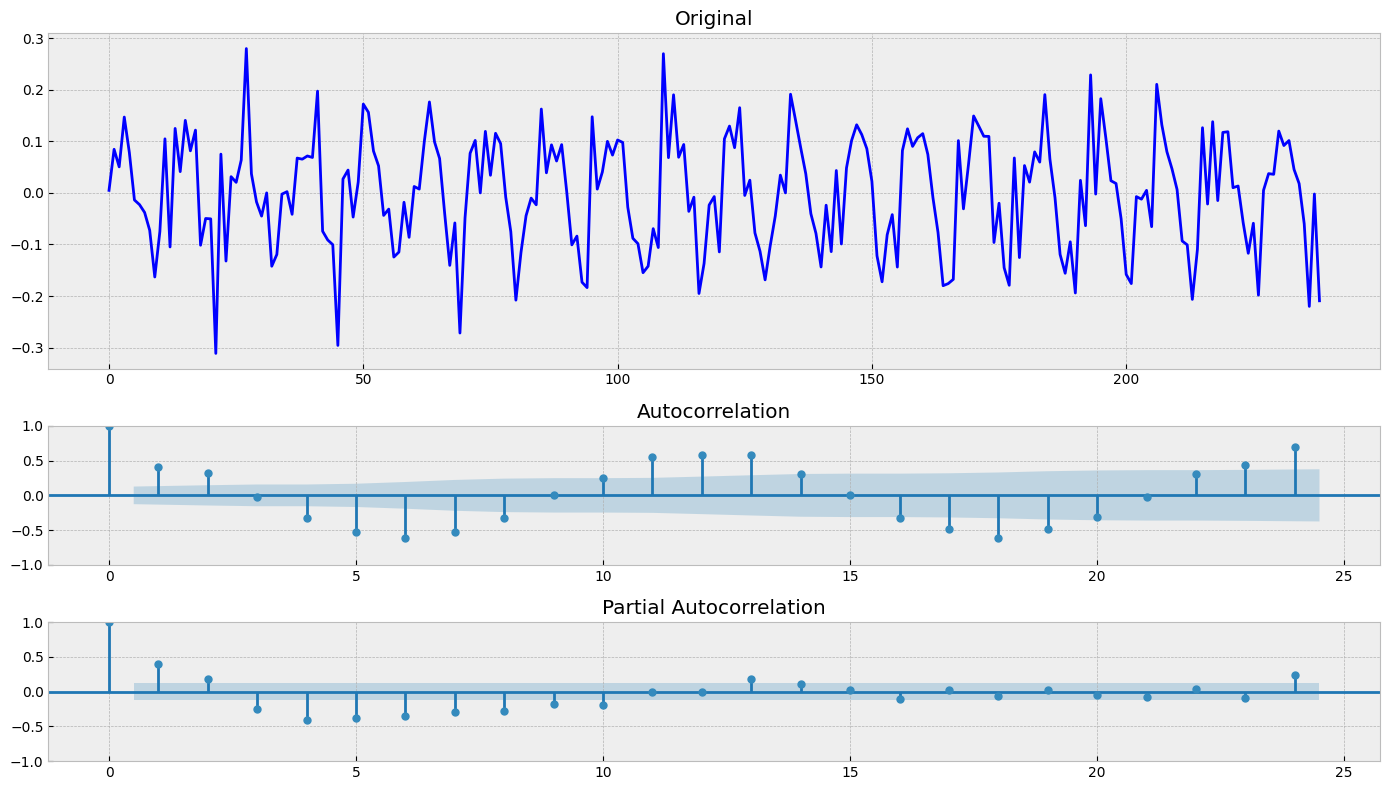

In [79]:
series_dif_4 = series_bc_4[1:] - series_bc_4[:-1]

tsplot(series_dif_4)

Стало еще лучше, но по тесту Дики-Фуллера и по графику коррелограммы видно сильное влияние сезонности. Уберем ее.

Results of Dickey-Fuller Test:
Test Statistic                  -5.229010
p-value                          0.000008
#Lags Used                      14.000000
Number of Observations Used    201.000000
Critical Value (1%)             -3.463309
Critical Value (5%)             -2.876029
Critical Value (10%)            -2.574493
dtype: float64


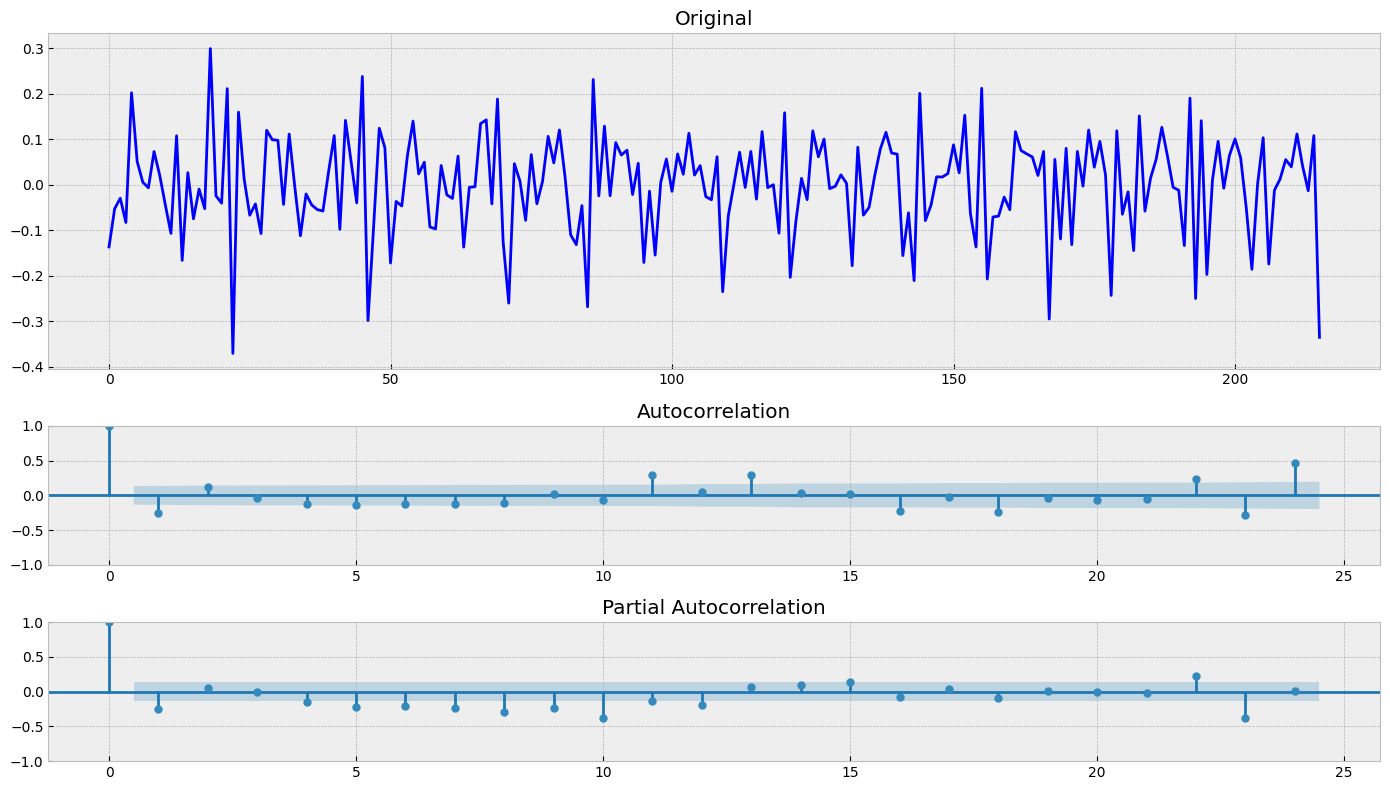

In [110]:
series_no_season_4 = series_dif_4[23:] - series_dif_4[:-23]

tsplot(series_no_season_4)

Тест Дики-Фуллера и графики коррелограм отвергают гипотезу о нестационарности ряда.

## д) weekly-closings-of-the-dowjones-.

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


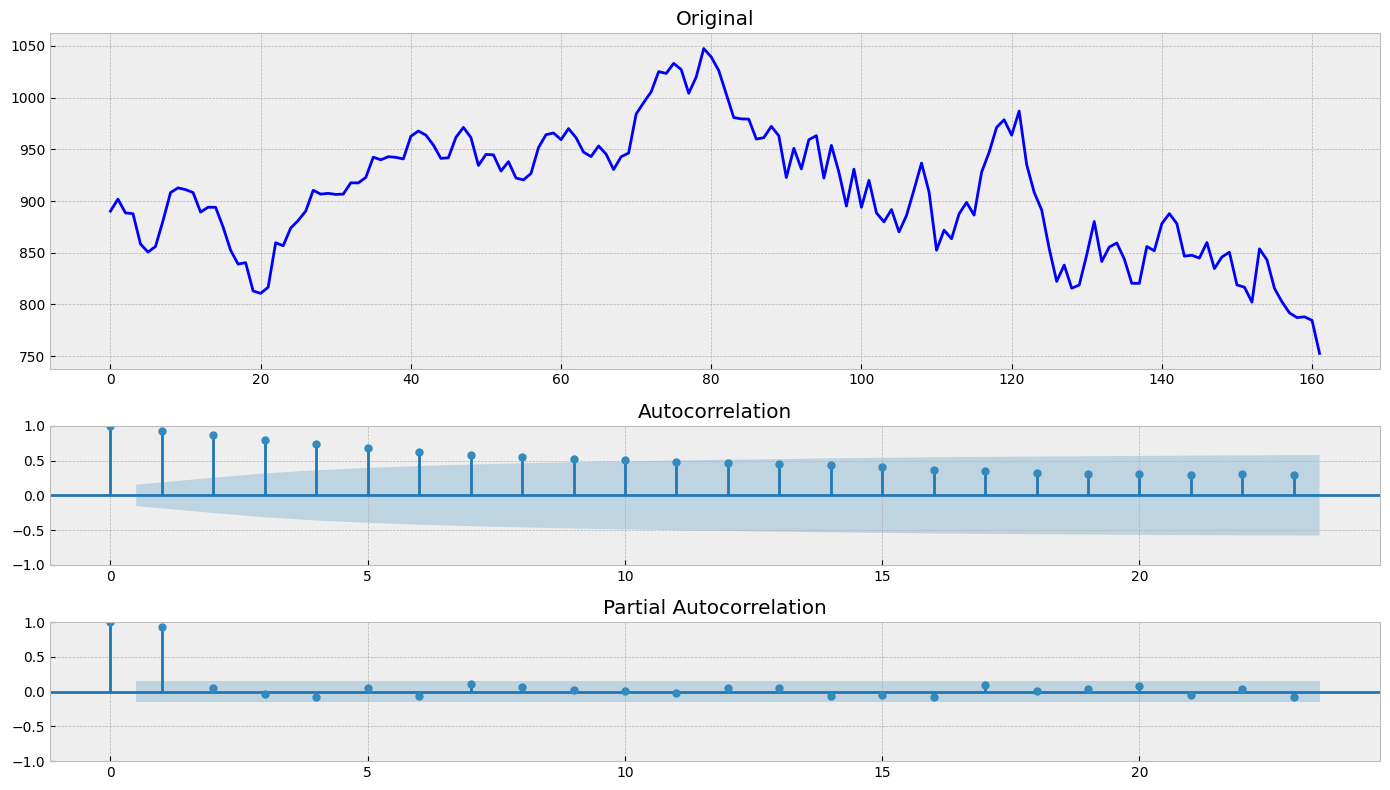

In [112]:
dowjones_closing
series_5 = dowjones_closing['Close']

tsplot(series_5)

По тесту Дики-Фуллера и графикам коррелограм видно, что график нестационарный. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


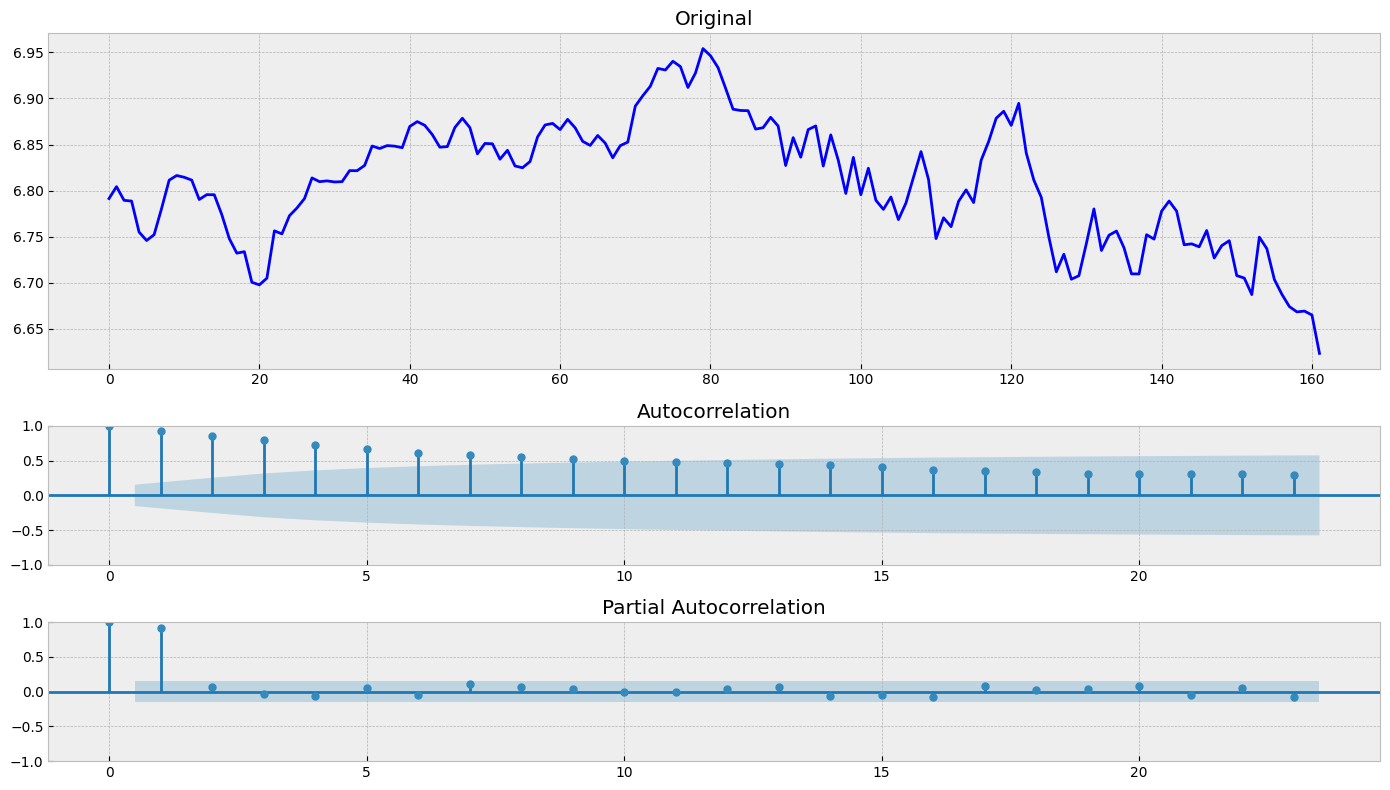

In [113]:
series_bc_5 = boxcox(series_5, 0)

tsplot(series_bc_5)

После прообразований удалось убрать размах дисперсии, но по результатам теста Дики-Фуллера и анализу графиков коррелограм график продолжает оставаться нестационарным. Используем дифференцирование.

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


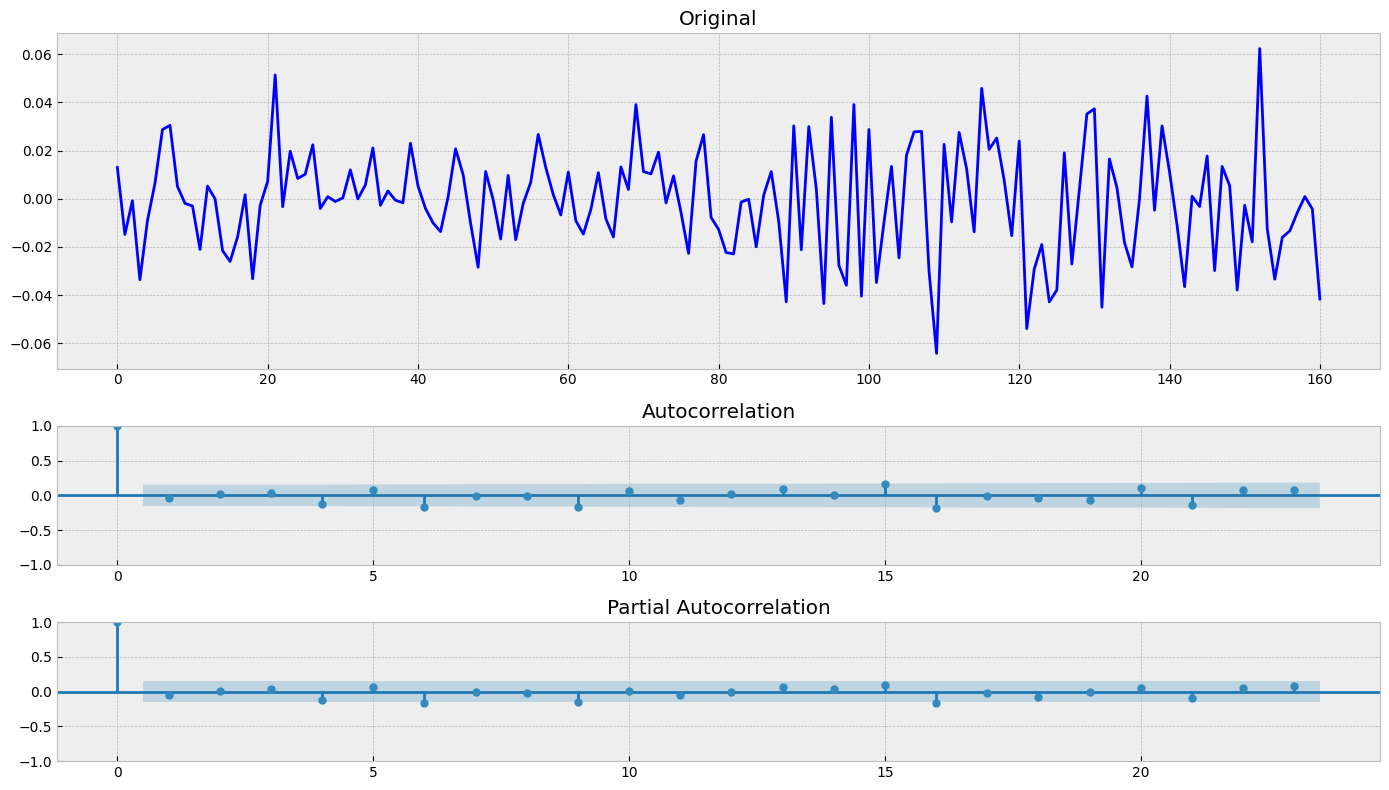

In [114]:
series_dif_5 = series_bc_5[1:] - series_bc_5[:-1]

tsplot(series_dif_5)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее.

Results of Dickey-Fuller Test:
Test Statistic                  -3.433413
p-value                          0.009871
#Lags Used                      14.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


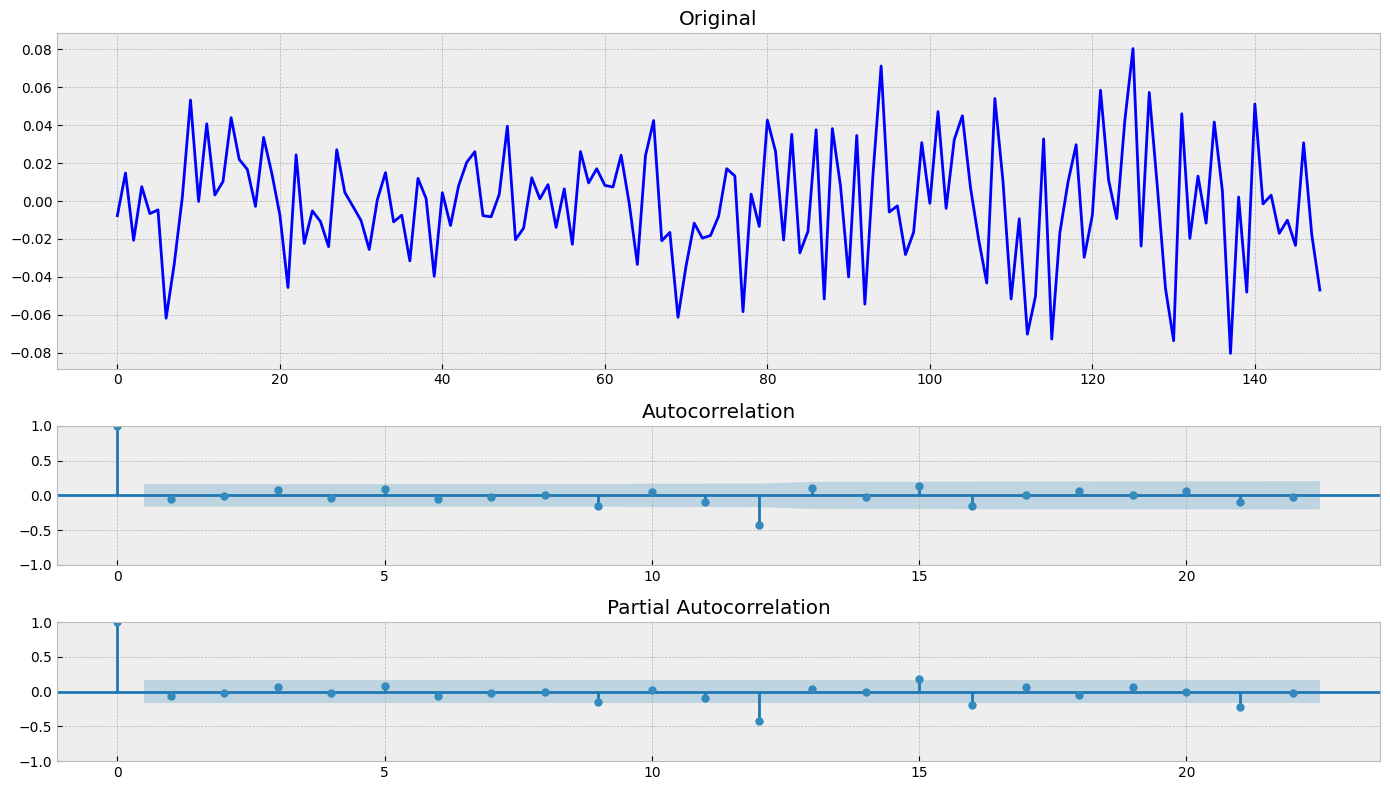

In [115]:
series_no_season_5 = series_dif_5[12:] - series_dif_5[:-12]

tsplot(series_no_season_5)

Тест Дики-Фуллера и графики коррелограм отвергают гипотезу о нестационарности ряда.

## е) daily-total-female-births-in-cal.

In [122]:
female_births

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


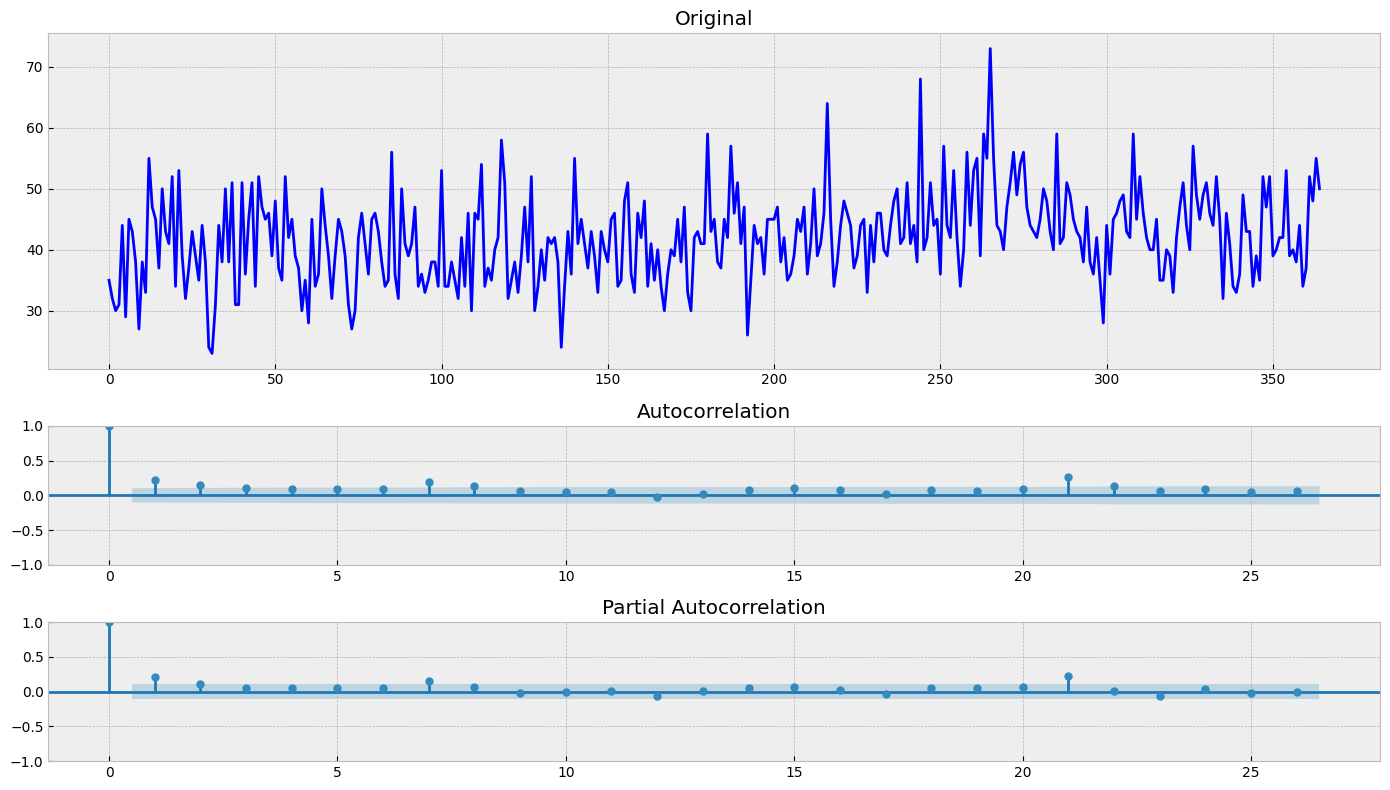

In [117]:
series_6 = female_births['Count']

tsplot(series_6)

По графикам коррелограм видно, что график нестационарный. Уберем изменение дисперсии при помощи преобразования Бокса-Кокса.

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


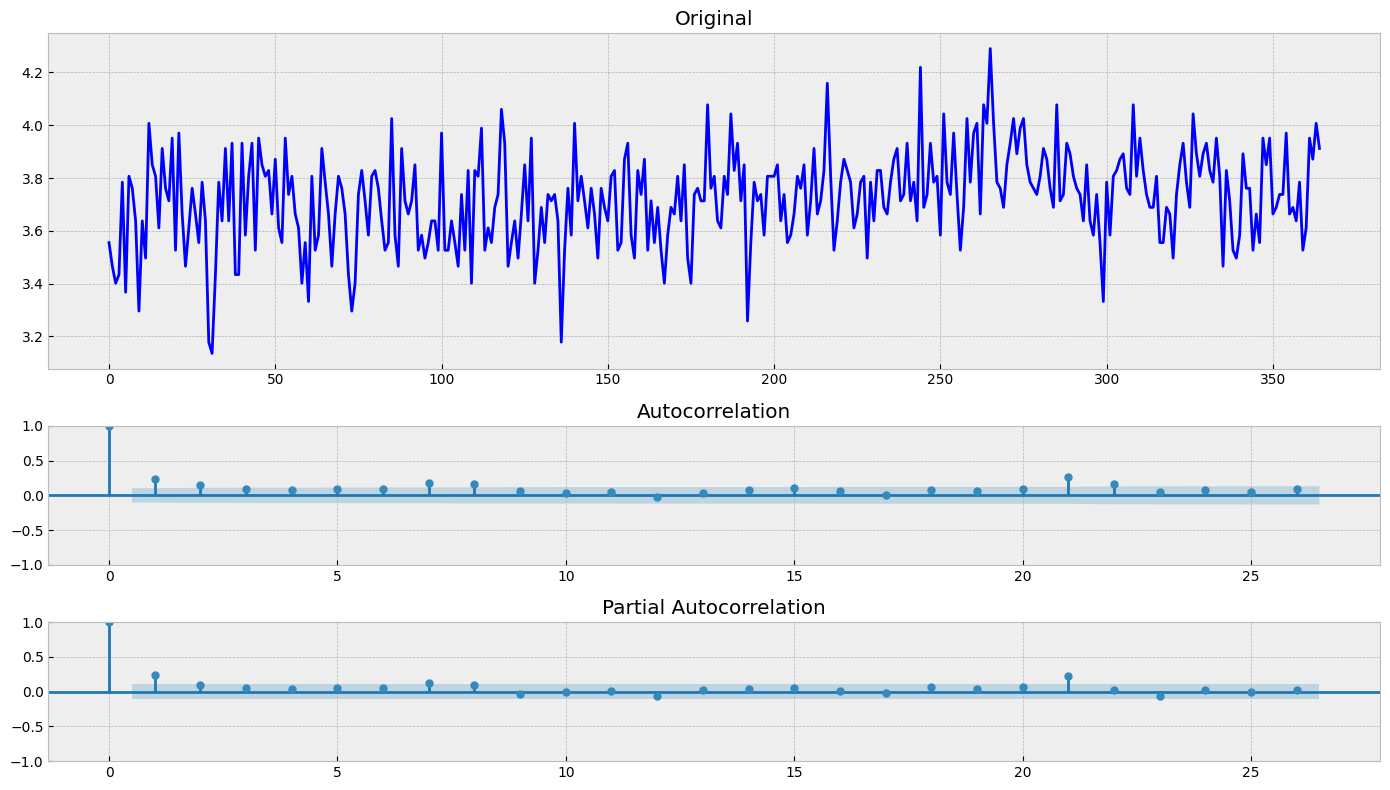

In [119]:
series_bc_6 = boxcox(series_6, 0)

tsplot(series_bc_6)

Тест Дики-Фуллера и графики коррелограм отвергают гипотезу о нестационарности ряда.